In [1]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# データ設定
yellow_data = "data/yellow_tripdata_2017-12.csv"
green_data = "data/green_tripdata_2017-12.csv"
zone_data = "data/taxi_zones.geojson"
empire_state_building = (40.748443, -73.985665)

In [3]:
# データ読み込み
yellow_df = pd.read_csv(yellow_data, header=0, index_col=None, engine='python')
green_df = pd.read_csv(green_data, header=0, index_col=None, engine='python')

In [4]:
# 読み込み結果の確認
yellow_df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-12-01 00:12:00,2017-12-01 00:12:51,1,0.0,1,N,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8
1,1,2017-12-01 00:13:37,2017-12-01 00:13:47,1,0.0,1,N,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8
2,1,2017-12-01 00:14:15,2017-12-01 00:15:05,1,0.0,1,N,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8


In [5]:
green_df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,1,2017-12-01 00:33:14,2017-12-01 00:40:22,N,1,42,24,1,1.40,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0
1,2,2017-12-01 00:16:06,2017-12-01 00:23:11,N,1,49,25,5,1.60,7.5,0.5,0.5,2.64,0.0,NaN,0.3,11.44,1,1.0
2,2,2017-12-01 00:24:05,2017-12-01 00:32:24,N,1,25,49,5,1.91,8.5,0.5,0.5,2.00,0.0,NaN,0.3,11.80,1,1.0


In [6]:
# データサイズ確認
print(yellow_df.shape)
print(green_df.shape)

(9508276, 17)
(906240, 19)


In [20]:
# カラム確認
print(yellow_df.columns)
print(green_df.columns)
print(set(yellow_df)-set(green_df))
print(set(green_df)-set(yellow_df))

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')
Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')
{'tpep_dropoff_datetime', 'tpep_pickup_datetime'}
{'trip_type', 'ehail_fee', 'lpep_pickup_datetime', 'lpep_dropoff_datetime'}


In [7]:
# 基本統計量
yellow_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06
mean,1.552153e+00,1.632386e+00,2.841248e+00,1.040817e+00,1.639006e+02,1.618380e+02,1.345665e+00,1.293521e+01,3.221178e-01,4.972710e-01,1.813980e+00,3.149101e-01,2.996154e-01,1.618621e+01
std,4.972727e-01,1.264036e+00,3.665802e+00,4.193037e-01,6.687440e+01,7.062320e+01,4.963531e-01,1.276011e+02,4.489527e-01,5.557419e-02,2.599233e+00,1.847027e+00,1.455794e-02,1.278660e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.400000e+02,-1.000000e+01,-5.000000e-01,-2.180000e+02,-1.900000e+01,-3.000000e-01,-3.403000e+02
25%,1.000000e+00,1.000000e+00,9.300000e-01,1.000000e+00,1.140000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.320000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,2.950000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,9.000000e+00,6.872200e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.919118e+05,6.980000e+01,1.178500e+02,4.960000e+02,9.758900e+02,1.000000e+00,3.919136e+05


In [8]:
green_df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,906240.000000,0.0,906240.000000,906240.000000,906240.000000,906239.000000
mean,1.825838,1.071538,110.812352,128.507389,1.368185,2.677710,11.874872,0.340943,0.488398,1.049092,0.101659,NaN,0.293318,14.172645,1.494520,1.017056
std,0.379249,0.529394,74.923133,76.960416,1.050139,2.868094,9.898816,0.389945,0.082981,1.927127,1.259227,NaN,0.049000,10.983033,0.522221,0.129481
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-140.000000,-4.500000,-0.500000,-88.800000,-5.760000,NaN,-0.300000,-140.000000,1.000000,1.000000
25%,2.000000,1.000000,49.000000,61.000000,1.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,7.800000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.710000,9.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,10.800000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,191.000000,1.000000,3.280000,14.500000,0.500000,0.500000,1.760000,0.000000,NaN,0.300000,16.800000,2.000000,1.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,108.730000,2134.000000,4.500000,0.500000,200.080000,200.000000,NaN,0.300000,2134.800000,5.000000,2.000000


In [10]:
# データ型
yellow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508276 entries, 0 to 9508275
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [11]:
green_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906240 entries, 0 to 906239
Data columns (total 19 columns):
VendorID                 906240 non-null int64
lpep_pickup_datetime     906240 non-null object
lpep_dropoff_datetime    906240 non-null object
store_and_fwd_flag       906240 non-null object
RatecodeID               906240 non-null int64
PULocationID             906240 non-null int64
DOLocationID             906240 non-null int64
passenger_count          906240 non-null int64
trip_distance            906240 non-null float64
fare_amount              906240 non-null float64
extra                    906240 non-null float64
mta_tax                  906240 non-null float64
tip_amount               906240 non-null float64
tolls_amount             906240 non-null float64
ehail_fee                0 non-null float64
improvement_surcharge    906240 non-null float64
total_amount             906240 non-null float64
payment_type             906240 non-null int64
trip_type                90

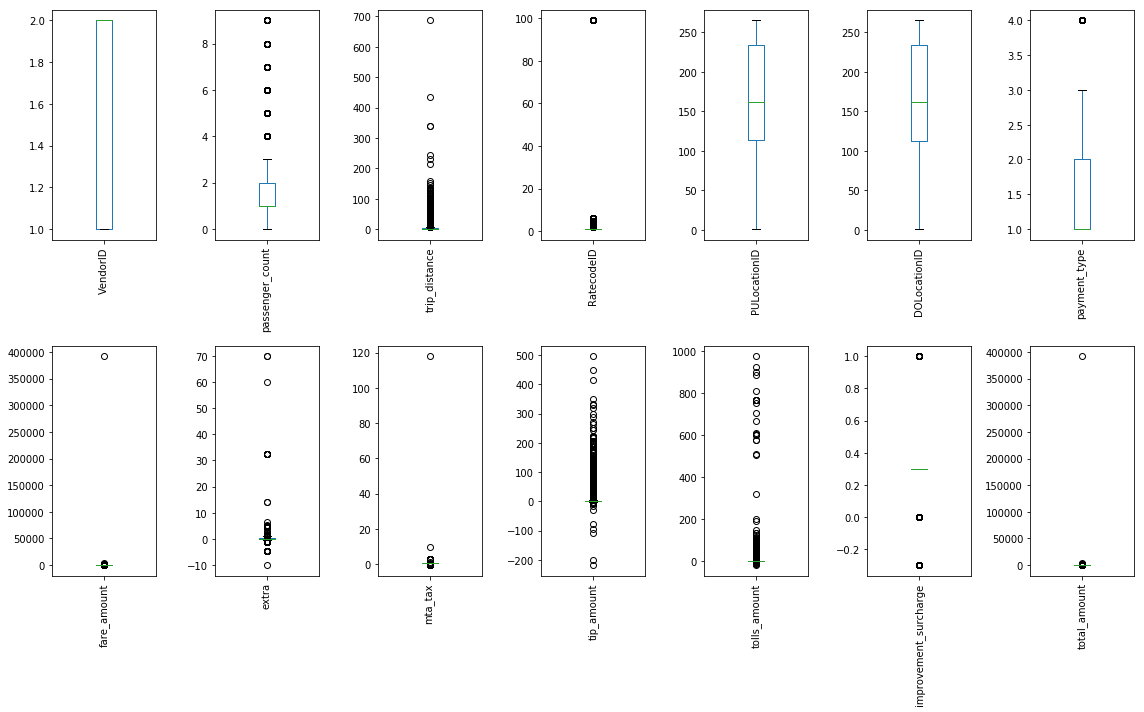

In [25]:
# 箱ひげ
yellow_df.plot.box(figsize=(16,10),rot=90,subplots=True,layout=(2,7))
plt.tight_layout()  # 文字の重なりを解消
plt.show()

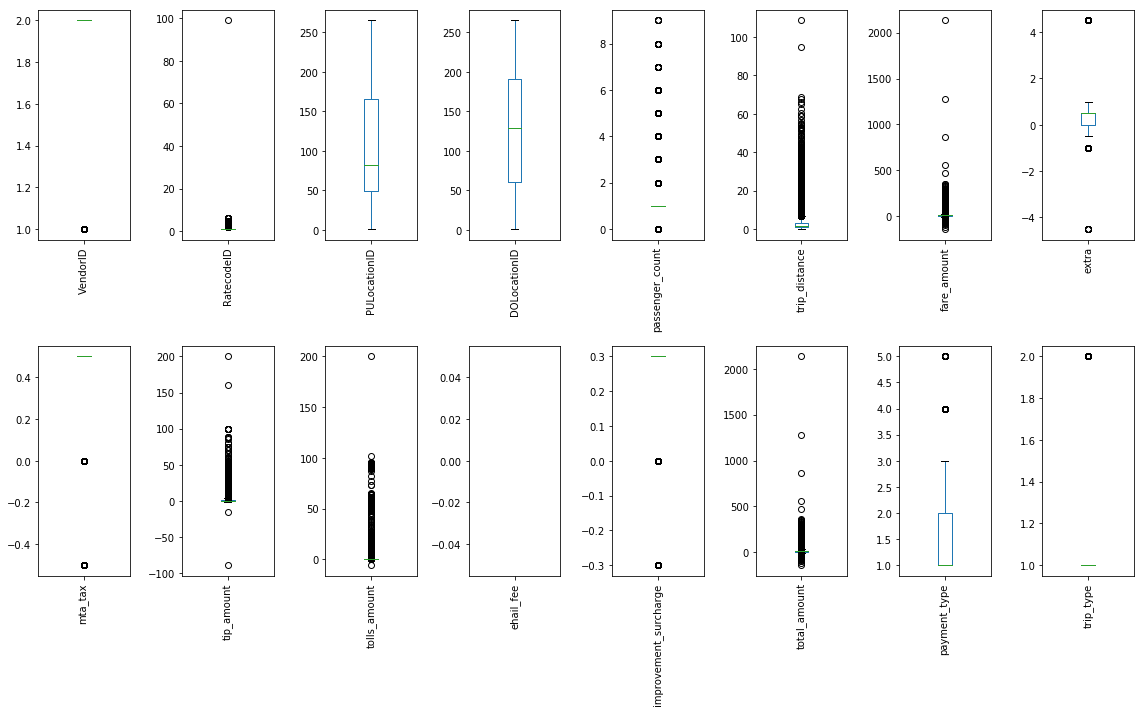

In [26]:
green_df.plot.box(figsize=(16,10),rot=90,subplots=True,layout=(2,8))
plt.tight_layout()  # 文字の重なりを解消
plt.show()

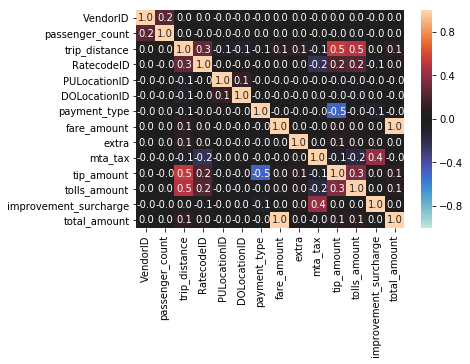

In [28]:
# 相関の確認
corr_mat = yellow_df.corr(method='pearson')
sns.heatmap(
    corr_mat,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    annot=True, # True:格子の中に値を表示
    fmt='.1f',
    xticklabels=corr_mat.columns.values,
    yticklabels=corr_mat.columns.values
)
plt.show()

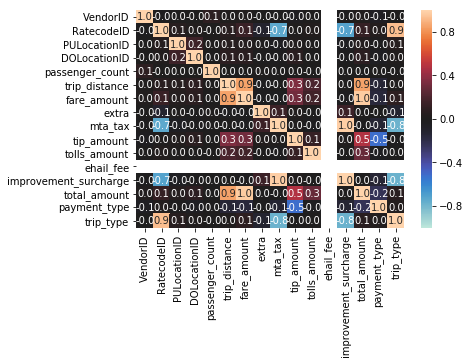

In [29]:
corr_mat = green_df.corr(method='pearson')
sns.heatmap(
    corr_mat,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    annot=True, # True:格子の中に値を表示
    fmt='.1f',
    xticklabels=corr_mat.columns.values,
    yticklabels=corr_mat.columns.values
)
plt.show()

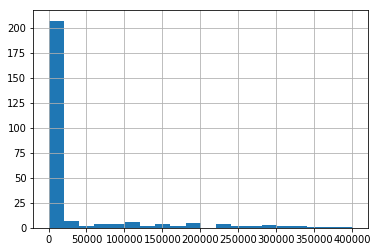

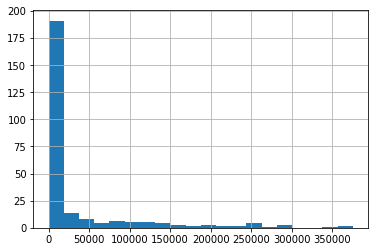

In [54]:
# 乗車位置の集計
df = yellow_df
PULoc_sum = pd.DataFrame(df["PULocationID"].value_counts())
PULoc_sum.columns = ["count"]
PULoc_sum["LocationID"] = PULoc_sum.index
PULoc_sum = PULoc_sum.sort_index()
PULoc_sum = PULoc_sum.drop([264, 265])
# 降車位置の集計
DOLoc_sum = pd.DataFrame(df["DOLocationID"].value_counts())
DOLoc_sum.columns = ["count"]
DOLoc_sum["LocationID"] = DOLoc_sum.index
DOLoc_sum = DOLoc_sum.sort_index()
DOLoc_sum = DOLoc_sum.drop([264, 265])  # NA/NVを消去
# ヒストグラム
PULoc_sum["count"].hist(bins=20)
plt.show()
DOLoc_sum["count"].hist(bins=20)
plt.show()

In [32]:
# マップの作製
m = folium.Map(location=empire_state_building, zoom_start=10)
# 乗車データのコロプレスマップ作成
data_choro = PULoc_sum
m.choropleth(
    geo_data=zone_data,
    data=data_choro,
    columns=["LocationID","count"],
    key_on="feature.properties.LocationID",
    fill_color='YlOrBr',
    #fill_opacity=1.,
    #line_opacity=0.8,
    name='pick up',
    threshold_scale=[0,100000,200000,300000,400000,500000],
    reset=True
)
# 降車データのコロプレスマップ作製
data_choro = DOLoc_sum
m.choropleth(
    geo_data=zone_data,
    data=data_choro,
    columns=["LocationID","count"],
    key_on="feature.properties.LocationID",
    fill_color='YlOrBr',
    #fill_opacity=1.,
    #line_opacity=.8,
    name='drop out',
    threshold_scale=[0,100000,200000,300000,400000,500000],
    reset=True
)
folium.LayerControl().add_to(m)
# 保存
m.save("map_nytaxi_y.html")

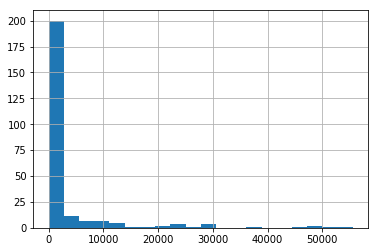

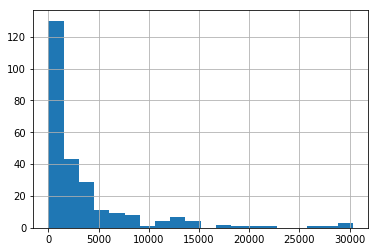

In [52]:
# 乗車位置の集計
df = green_df
PULoc_sum = pd.DataFrame(df["PULocationID"].value_counts())
PULoc_sum.columns = ["count"]
PULoc_sum["LocationID"] = PULoc_sum.index
PULoc_sum = PULoc_sum.sort_index()
PULoc_sum = PULoc_sum.drop([264, 265])
# 降車位置の集計
DOLoc_sum = pd.DataFrame(df["DOLocationID"].value_counts())
DOLoc_sum.columns = ["count"]
DOLoc_sum["LocationID"] = DOLoc_sum.index
DOLoc_sum = DOLoc_sum.sort_index()
DOLoc_sum = DOLoc_sum.drop([264, 265])  # NA/NVを消去
# ヒストグラム
PULoc_sum["count"].hist(bins=20)
plt.show()
DOLoc_sum["count"].hist(bins=20)
plt.show()

In [45]:
# マップの作製
m = folium.Map(location=empire_state_building, zoom_start=10)
# 乗車データのコロプレスマップ作成
data_choro = PULoc_sum
m.choropleth(
    geo_data=zone_data,
    data=data_choro,
    columns=["LocationID","count"],
    key_on="feature.properties.LocationID",
    fill_color='YlOrBr',
    #fill_opacity=1.,
    #line_opacity=0.8,
    name='pick up',
    threshold_scale=[0,10000,20000,30000,40000,60000],
    reset=True
)
# 降車データのコロプレスマップ作製
data_choro = DOLoc_sum
m.choropleth(
    geo_data=zone_data,
    data=data_choro,
    columns=["LocationID","count"],
    key_on="feature.properties.LocationID",
    fill_color='YlOrBr',
    #fill_opacity=1.,
    #line_opacity=.8,
    name='drop out',
    threshold_scale=[0,10000,20000,30000,40000,60000],
    reset=True
)
folium.LayerControl().add_to(m)
# 保存
m.save("map_nytaxi_g.html")